# Medway's Parliamentary Constituencies


### Links

Medway's Parliamentary Constituencies  
https://www.medwayelects.co.uk/?page=constituencies

In [39]:
import geopandas as gpd
from matplotlib import pyplot as plt

In [29]:
medway_constituencies = {
    "Chatham and Aylesford",
    "Gillingham and Rainham",
    "Rochester and Strood"
}


In [18]:
# Download boundary data (76MB)
# !wget -P ./data https://boundarycommissionforengland.independent.gov.uk/wp-content/uploads/2023/06/232597_2023_06_27_Final_recommendations_England_gpkg.zip


--2024-11-26 09:19:21--  https://boundarycommissionforengland.independent.gov.uk/wp-content/uploads/2023/06/232597_2023_06_27_Final_recommendations_England_gpkg.zip
Resolving boundarycommissionforengland.independent.gov.uk (boundarycommissionforengland.independent.gov.uk)... 18.245.253.32, 18.245.253.94, 18.245.253.111, ...
Connecting to boundarycommissionforengland.independent.gov.uk (boundarycommissionforengland.independent.gov.uk)|18.245.253.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79821771 (76M) [application/zip]
Saving to: ‘./data/232597_2023_06_27_Final_recommendations_England_gpkg.zip’

232597_2023_06_27_F 100%[===================>]  76.12M  5.32MB/s    in 15s     

2024-11-26 09:19:36 (5.23 MB/s) - ‘./data/232597_2023_06_27_Final_recommendations_England_gpkg.zip’ saved [79821771/79821771]



In [45]:
# Constituencies
path_constituencies = 'data/2023_06_27_Final_recommendations_England.gpkg'

medway_cons = (
    gpd.read_file(path_constituencies)
    .rename(columns={'Constituen':'Constituency', 'Designatio':'Designation'})
    .to_crs(epsg=4326)
    .loc[lambda _df: _df['Constituency'].isin(medway_constituencies)]
)

medway_cons

/opt/conda/lib/python3.10/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in '2023_06_27_Final_recommendations_England.gpkg': '2023_07_01_Final_recommendations_England' (default), '2023_06_27_Final_recommendations_England'. Specify layer parameter to avoid this warning.
  result = read_func(


,ID,Constituency,Electorate,Designation,Region,Area km2,Density,Sub region,geometry
347,350,Rochester and Strood,72155,County Constituency,South East,208.90,345.40,Kent,"MULTIPOLYGON Z (((0.42603 51.37803 0, 0.4263 5..."
348,351,Chatham and Aylesford,74840,County Constituency,South East,56.27,1330.02,Kent,"MULTIPOLYGON Z (((0.43084 51.29803 0, 0.43085 ..."
349,352,Gillingham and Rainham,73951,Borough Constituency,South East,41.80,1769.16,Kent,"MULTIPOLYGON Z (((0.6306 51.36091 0, 0.63029 5..."


In [48]:
# Wards
path_wards = 'data/Medway_wards.geojson'
medway_wards = (
    gpd.read_file(path_wards)    
    # .to_crs(epsg=4326)
    # .loc[lambda _df: _df['Constituency'].isin(medway_constituencies)]
)

medway_wards.head()

,OBJECTID,Name,Ward_name,No_of_coun,Current_el,Forecast_e,SHAPE_Leng,SHAPE_Area,geometry
0,1,Fort Horsted,Fort Horsted,1,3426,3653,7692.183021,2.098186e+06,"POLYGON ((0.49705 51.36034, 0.49733 51.3603, 0..."
1,2,Rainham South East,Rainham South East,3,10678,11376,11682.055510,5.605590e+06,"POLYGON ((0.61556 51.36184, 0.61655 51.36165, ..."
2,3,Lordswood & Walderslade,Lordswood & Walderslade,3,11342,11954,16858.727262,6.744457e+06,"POLYGON ((0.54855 51.36459, 0.54862 51.36453, ..."
3,4,Princes Park,Princes Park,2,6807,7085,7820.077862,1.634136e+06,"POLYGON ((0.54797 51.36585, 0.54805 51.36583, ..."
4,5,Hempstead & Wigmore,Hempstead & Wigmore,2,7628,8156,13225.376909,4.504709e+06,"POLYGON ((0.55855 51.3671, 0.55856 51.36709, 0..."


<AxesSubplot: >

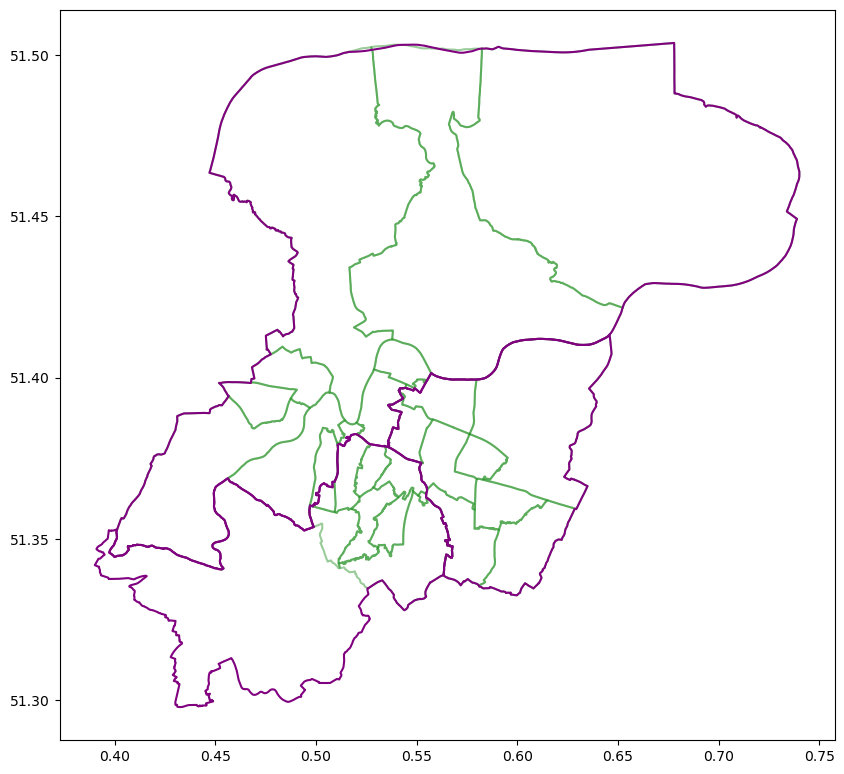

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
medway_wards.boundary.plot(ax=ax, color='green', alpha=.4)
medway_cons.boundary.plot(ax=ax, color='purple')